In [1]:
import numpy as np
import embedded_voting as ev
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.stats import gennorm, skewnorm
import tikzplotlib

In [2]:
n_candidates = 50
n_trys = 10000
default_group_noise = 10
n_training = 1000
default_indep_noise = 2

In [4]:
groups_sizes = [30] + [1]*20
features = np.eye(21)
generator = ev.RatingsGeneratorEpistemicGroupsMixFree(groups_sizes, 
                                                      features, 
                                                      group_noise=default_group_noise, 
                                                      independent_noise=default_indep_noise,
                                                      center_gap=0, 
                                                      max_scale=1,
                                                      truth_generator=ev.TruthGeneratorNormal(),
                                                      group_noise_f=np.random.normal,
                                                      independent_noise_f=np.random.normal)

In [6]:
ratings_training = generator(n_training)
ratings_training = np.maximum(ratings_training, 0)
truth = generator.ground_truth_
ratings_training = np.concatenate([[truth], ratings_training])
np.savetxt("ratings_base_case_training_normal.csv", ratings_training, delimiter=",")

In [5]:
ratings_testing = generator(n_candidates*n_trys)
ratings_testing = np.maximum(ratings_testing, 0)
truth = generator.ground_truth_
ratings_testing = np.concatenate([[truth], ratings_testing])
np.savetxt("ratings_base_case_testing_normal.csv", ratings_testing, delimiter=",")

In [7]:
n_candidates = 20

In [10]:
def create_generator_gnoise(gnoise=1):
    groups_sizes = [20, 1, 1, 1, 1]
    features = np.eye(5)
    generator =  ev.RatingsGeneratorEpistemicGroupsMixFree(groups_sizes, 
                                                      features, 
                                                      group_noise=gnoise, 
                                                      independent_noise=default_indep_noise,
                                                     center_gap=0, 
                                                     max_scale=1,
                                                     truth_generator=ev.TruthGeneratorNormal(),
                                                     group_noise_f=np.random.normal,
                                                     independent_noise_f=np.random.normal)
    
    ratings_training = generator(n_training)
    ratings_training = np.maximum(ratings_training, 0)
    truth = generator.ground_truth_
    ratings_training = np.concatenate([[truth], ratings_training])
    np.savetxt("ratings_gnoise_%i_training_normal.csv"%gnoise, ratings_training, delimiter=",")
    
    ratings_testing = generator(n_candidates*n_trys)
    ratings_testing = np.maximum(ratings_testing, 0)
    truth = generator.ground_truth_
    ratings_testing = np.concatenate([[truth], ratings_testing])
    np.savetxt("ratings_gnoise_%i_testing_normal.csv"%gnoise, ratings_testing, delimiter=",")
    

for i in tqdm(range(0,21,2)):
    if i != 10:
        create_generator_gnoise(i)

100%|██████████| 11/11 [01:40<00:00,  9.17s/it]


In [11]:
def create_generator_inoise(inoise=1):
    groups_sizes = [20, 1, 1, 1, 1]
    features = np.eye(5)
    generator =  ev.RatingsGeneratorEpistemicGroupsMixFree(groups_sizes, 
                                                      features, 
                                                      group_noise=default_group_noise, 
                                                      independent_noise=inoise,
                                                     center_gap=0, 
                                                     max_scale=1,
                                                     truth_generator=ev.TruthGeneratorNormal(),
                                                     group_noise_f=np.random.normal,
                                                     independent_noise_f=np.random.normal)
    
    ratings_training = generator(n_training)
    ratings_training = np.maximum(ratings_training, 0)
    truth = generator.ground_truth_
    ratings_training = np.concatenate([[truth], ratings_training])
    np.savetxt("ratings_inoise_%i_training_normal.csv"%inoise, ratings_training, delimiter=",")
    
    ratings_testing = generator(n_candidates*n_trys)
    ratings_testing = np.maximum(ratings_testing, 0)
    truth = generator.ground_truth_
    ratings_testing = np.concatenate([[truth], ratings_testing])
    np.savetxt("ratings_inoise_%i_testing_normal.csv"%inoise, ratings_testing, delimiter=",")
    

for i in tqdm([0,1] + list(range(2,21,2))):
    if i != default_indep_noise:
        create_generator_inoise(i)

100%|██████████| 12/12 [01:57<00:00,  9.80s/it]


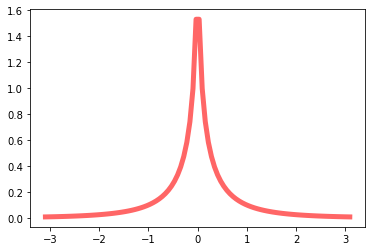

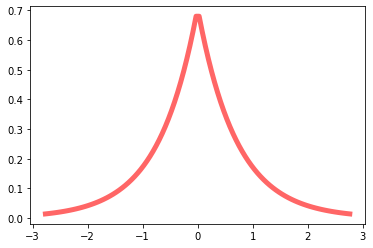

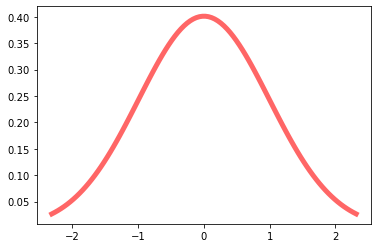

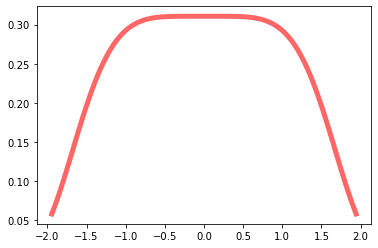

In [6]:


def create_gennorm(beta=1):
    std = gennorm.rvs(beta, scale=1, size=100000).std()
    scale = 1/std
    def f1(size):
        return gennorm.rvs(beta, scale=scale, size=size)
    return f1


def plot_gennorm(beta=1):
    std = gennorm.rvs(beta, scale=1, size=100000).std()
    scale = 1/std
    fig, ax = plt.subplots(1, 1)
    x = np.linspace(gennorm.ppf(0.01, beta, scale=scale),

                    gennorm.ppf(0.99, beta, scale=scale), 100)

    ax.plot(x, gennorm.pdf(x, beta, scale=scale),

           'r-', lw=5, alpha=0.6, label='gennorm pdf')

    
    tikzplotlib.save("gennorm_%2f.tex"%beta)
    plt.show()
    
    
for x in [0.5,1,2,5]:
    plot_gennorm(x)

1.6138438289107926 0.9991986208134178


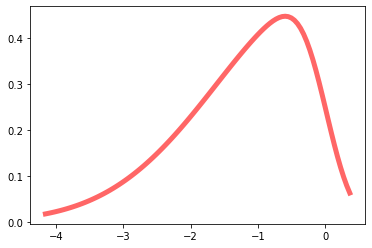

1.6124079061558236 1.0089976597760977


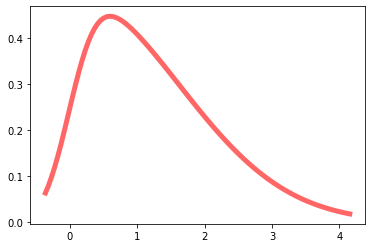

In [7]:

def create_skewnorm(beta=1):
    std = skewnorm.rvs(beta, scale=1, size=100000).std()
    scale = 1/std
    def f1(size):
        return skewnorm.rvs(beta, scale=scale, size=size)
    return f1


def plot_skewnorm(beta=1):
    std = skewnorm.rvs(beta, scale=1, size=100000).std()
    scale = 1/std
    fig, ax = plt.subplots(1, 1)
    x = np.linspace(skewnorm.ppf(0.01, beta, scale=scale),

                    skewnorm.ppf(0.99, beta, scale=scale), 100)

    ax.plot(x, skewnorm.pdf(x, beta, scale=scale),

           'r-', lw=5, alpha=0.6, label='gennorm pdf')

    print(scale, skewnorm.rvs(beta, scale=scale, size=10000).std())
    
    tikzplotlib.save("skewnorm_%2f.tex"%beta)
    plt.show()
    
    
for x in [-5,5]:
    plot_skewnorm(x)

In [8]:
def f1(size):
    return np.random.normal(0,1,size)

list_bruits = [create_gennorm(0.5), create_gennorm(5), create_skewnorm(-5), create_skewnorm(5)]
bruits_name = ["GenNormSmall", "GenNormLarge", "SkewNormRight", "SkewNormLeft"]

In [9]:
def create_generator_gnoisef(i):
    bruit = list_bruits[i]
    groups_sizes = [20, 1, 1, 1, 1]
    features = np.eye(5)
    generator = ev.RatingsGeneratorEpistemicGroupsMixFree(groups_sizes, 
                                                      features, 
                                                      group_noise=default_group_noise, 
                                                      independent_noise=default_indep_noise,
                                                      center_gap=0, 
                                                      max_scale=1,
                                                      truth_generator=ev.TruthGeneratorUniform(seed=42),
                                                      group_noise_f=bruit,
                                                      independent_noise_f=np.random.normal)
    
    ratings_training = generator(n_training)
    ratings_training = np.maximum(ratings_training, 0)
    truth = generator.ground_truth_
    ratings_training = np.concatenate([[truth], ratings_training])
    np.savetxt("ratings_gnoisef_%s_training.csv"%bruits_name[i], ratings_training, delimiter=",")
    
    ratings_testing = generator(n_candidates*n_trys)
    ratings_testing = np.maximum(ratings_testing, 0)
    truth = generator.ground_truth_
    ratings_testing = np.concatenate([[truth], ratings_testing])
    np.savetxt("ratings_gnoisef_%s_testing.csv"%bruits_name[i], ratings_testing, delimiter=",")
    

for i in tqdm(range(len(list_bruits))):
    create_generator_gnoisef(i)

100%|██████████| 4/4 [03:21<00:00, 50.44s/it]


In [19]:
def create_generator_inoisef(i):
    bruit = list_bruits[i]
    groups_sizes = [20, 1, 1, 1, 1]
    features = np.eye(5)
    generator = ev.RatingsGeneratorEpistemicGroupsMixFree(groups_sizes, 
                                                      features, 
                                                      group_noise=default_group_noise, 
                                                      independent_noise=default_indep_noise,
                                                      center_gap=0, 
                                                      max_scale=1,
                                                      truth_generator=ev.TruthGeneratorUniform(seed=42),
                                                          group_noise_f=np.random.normal,
                                                          independent_noise_f=bruit)
    
    ratings_training = generator(n_training)
    ratings_training = np.maximum(ratings_training, 0)
    truth = generator.ground_truth_
    ratings_training = np.concatenate([[truth], ratings_training])
    np.savetxt("ratings_inoisef_%s_training.csv"%bruits_name[i], ratings_training, delimiter=",")
    
    ratings_testing = generator(n_candidates*n_trys)
    ratings_testing = np.maximum(ratings_testing, 0)
    truth = generator.ground_truth_
    ratings_testing = np.concatenate([[truth], ratings_testing])
    np.savetxt("ratings_inoisef_%s_testing.csv"%bruits_name[i], ratings_testing, delimiter=",")
    

for i in tqdm(range(len(list_bruits))):
    create_generator_inoisef(i)

100%|██████████| 4/4 [02:29<00:00, 37.48s/it]


In [58]:
f1 = lambda x: np.random.uniform(10,20,x)
f2 = lambda x:np.random.normal(15,2.89,x)
f3 = lambda x:(10+np.random.power(1,x)*10)
f4 = lambda x:(10+np.random.gamma(2.89**2,1,x))
f5 = lambda x:(10+np.random.gamma(1,2.89,x))
f6 = lambda x:(10+np.random.exponential(2.89,x))
class TruthGeneratorFunction(ev.TruthGenerator):
    def __init__(self, f):
        self.f = f

    def __call__(self, n_candidates):
        return self.f(n_candidates)

In [59]:
list_bruits = [TruthGeneratorFunction(f1), TruthGeneratorFunction(f2),
              TruthGeneratorFunction(f3), TruthGeneratorFunction(f4),
              TruthGeneratorFunction(f5), TruthGeneratorFunction(f6)]

bruits_name = ["Uniform", "Normal", "PowerLaw", "Gamma1", "Gamma2", "Exponential"]

In [60]:
def create_generator_truth(i):
    bruit = list_bruits[i]
    groups_sizes = [20, 1, 1, 1, 1]
    features = np.eye(5)
    generator = ev.RatingsGeneratorEpistemicGroupsMixFree(groups_sizes, 
                                                      features, 
                                                      group_noise=default_group_noise, 
                                                      independent_noise=default_indep_noise,
                                                      center_gap=0, 
                                                      max_scale=1,
                                                          truth_generator=bruit,
                                                          group_noise_f=np.random.normal,
                                                          independent_noise_f=np.random.normal)
    
    ratings_training = generator(n_training)
    ratings_training = np.maximum(ratings_training, 0)
    truth = generator.ground_truth_
    ratings_training = np.concatenate([[truth], ratings_training])
    np.savetxt("ratings_truth_%s_training.csv"%bruits_name[i], ratings_training, delimiter=",")
    
    ratings_testing = generator(n_candidates*n_trys)
    ratings_testing = np.maximum(ratings_testing, 0)
    truth = generator.ground_truth_
    ratings_testing = np.concatenate([[truth], ratings_testing])
    np.savetxt("ratings_truth_%s_testing.csv"%bruits_name[i], ratings_testing, delimiter=",")
    

for i in tqdm(range(len(list_bruits))):
    create_generator_truth(i)

100%|██████████| 6/6 [01:21<00:00, 13.65s/it]


# 24/08 - Corr groups

In [4]:
def mymatrix(alpha):
    M = np.eye(24)
    for i in range(20):
        M[i] = [alpha**(np.abs(j-i)) for j in range(20)]+[0]*4
    return M


def create_generator_cross_1(alpha):
    groups_sizes = [1]*24
    features = mymatrix(alpha)
    generator = ev.RatingsGeneratorEpistemicGroupsMixFree(groups_sizes, 
                                                      features, 
                                                      group_noise=default_group_noise, 
                                                      independent_noise=default_indep_noise,
                                                      center_gap=0, 
                                                      max_scale=1,
                                                      truth_generator=ev.TruthGeneratorUniform(seed=42),
                                                      group_noise_f=np.random.normal,
                                                      independent_noise_f=np.random.normal)
    
    ratings_training = generator(n_training)
    ratings_training = np.maximum(ratings_training, 0)
    truth = generator.ground_truth_
    ratings_training = np.concatenate([[truth], ratings_training])
    np.savetxt("ratings_cc1_%.2f_training.csv"%alpha, ratings_training, delimiter=",")
    
    ratings_testing = generator(n_candidates*n_trys)
    ratings_testing = np.maximum(ratings_testing, 0)
    truth = generator.ground_truth_
    ratings_testing = np.concatenate([[truth], ratings_testing])
    np.savetxt("ratings_cc1_%.2f_testing.csv"%alpha, ratings_testing, delimiter=",")
    

    

list_alpha = [0.1*i for i in range(11)]
for alpha in list_alpha:
    create_generator_cross_1(alpha)


In [7]:
def mymatrix(alpha):
    M = np.eye(5)
    for i in range(4):
        M[i+1,0] = alpha
        M[i+1,i+1] = 1-alpha
        
    return M


def create_generator_cross_2(alpha):
    groups_sizes = [20,1,1,1,1]
    features = mymatrix(alpha)
    generator = ev.RatingsGeneratorEpistemicGroupsMixFree(groups_sizes, 
                                                      features, 
                                                      group_noise=default_group_noise, 
                                                      independent_noise=default_indep_noise,
                                                      center_gap=0, 
                                                      max_scale=1,
                                                          truth_generator=ev.TruthGeneratorUniform(seed=42),
                                                          group_noise_f=np.random.normal,
                                                          independent_noise_f=np.random.normal)
    
    ratings_training = generator(n_training)
    ratings_training = np.maximum(ratings_training, 0)
    truth = generator.ground_truth_
    ratings_training = np.concatenate([[truth], ratings_training])
    np.savetxt("ratings_cc2_%.2f_training.csv"%alpha, ratings_training, delimiter=",")
    
    ratings_testing = generator(n_candidates*n_trys)
    ratings_testing = np.maximum(ratings_testing, 0)
    truth = generator.ground_truth_
    ratings_testing = np.concatenate([[truth], ratings_testing])
    np.savetxt("ratings_cc2_%.2f_testing.csv"%alpha, ratings_testing, delimiter=",")
    

    

list_alpha = [0.1*i for i in range(11)]
#for alpha in list_alpha:
#    create_generator_cross_2(alpha)
create_generator_cross_2(1)